In [1]:

import os
import pandas as pd
from PIL import Image

# Define the paths to your image folders
real_folder_path = r'C:\Users\User\Downloads\ML_Dataset\test\REAL'
fake_folder_path = r'C:\Users\User\Downloads\ML_Dataset\test\FAKE'

# Create a list to hold image information
image_data = []

# Function to add image data to the list
def add_images_from_folder(folder_path, label):
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            file_path = os.path.join(folder_path, filename)
            image_data.append({'filename': filename, 'file_path': file_path, 'label': label})

# Add images from both folders
add_images_from_folder(real_folder_path, 'real')
add_images_from_folder(fake_folder_path, 'fake')

# Create a DataFrame from the image data
df = pd.DataFrame(image_data)

# Save the DataFrame to a CSV file
csv_file_path = 'image_data.csv'
df.to_csv(csv_file_path, index=False)

print(f'CSV file saved to {csv_file_path}')


CSV file saved to image_data.csv


In [5]:
import pandas as pd

# Load and display the CSV file
csv_file_path = 'image_data.csv'
df = pd.read_csv(csv_file_path)

# Display the DataFrame
df


filename                                          file_path label
0      0000 (10).jpg  C:\Users\User\Downloads\ML_Dataset\test\REAL\0...  real
1       0000 (2).jpg  C:\Users\User\Downloads\ML_Dataset\test\REAL\0...  real
2       0000 (3).jpg  C:\Users\User\Downloads\ML_Dataset\test\REAL\0...  real
3       0000 (4).jpg  C:\Users\User\Downloads\ML_Dataset\test\REAL\0...  real
4       0000 (5).jpg  C:\Users\User\Downloads\ML_Dataset\test\REAL\0...  real
...              ...                                                ...   ...
19995    999 (6).jpg  C:\Users\User\Downloads\ML_Dataset\test\FAKE\9...  fake
19996    999 (7).jpg  C:\Users\User\Downloads\ML_Dataset\test\FAKE\9...  fake
19997    999 (8).jpg  C:\Users\User\Downloads\ML_Dataset\test\FAKE\9...  fake
19998    999 (9).jpg  C:\Users\User\Downloads\ML_Dataset\test\FAKE\9...  fake
19999        999.jpg  C:\Users\User\Downloads\ML_Dataset\test\FAKE\9...  fake

[20000 rows x 3 columns]

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from scipy.spatial.distance import euclidean

# Load the CSV file
df = pd.read_csv('image_data.csv')

# Initialize the ResNet50 model for feature extraction
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
model = Model(inputs=base_model.input, outputs=base_model.output)

def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = model.predict(img_array)
    return features.flatten()

# Extract features and labels
features = []
labels = []
for idx, row in df.iterrows():
    feature_vector = extract_features(row['file_path'])
    features.append(feature_vector)
    labels.append(row['label'])

features = np.array(features)
labels = np.array(labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [2]:
print(df.columns)



Index(['filename', 'file_path', 'label'], dtype='object')


In [5]:
import os
import pandas as pd
from PIL import Image

# Define the paths to your image folders
real_folder_path = r'C:\Users\User\Downloads\ML_Dataset\test\REAL'
fake_folder_path = r'C:\Users\User\Downloads\ML_Dataset\test\FAKE'

# Create a list to hold image information
image_data = []

# Function to add image data to the list
def add_images_from_folder(folder_path, label):
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            file_path = os.path.join(folder_path, filename)
            try:
                # Open the image using PIL to get width and height
                with Image.open(file_path) as img:
                    width, height = img.size
                    file_size = os.path.getsize(file_path)  # Get file size in bytes
                    
                    # Add image information to the list
                    image_data.append({
                        'filename': filename,
                        'file_path': file_path,
                        'label': label,
                        'width': width,
                        'height': height,
                        'file_size': file_size
                    })
            except Exception as e:
                print(f"Error processing image {filename}: {e}")

# Add images from both folders
add_images_from_folder(real_folder_path, 'real')
add_images_from_folder(fake_folder_path, 'fake')

# Create a DataFrame from the image data
df = pd.DataFrame(image_data)

# Save the DataFrame to a CSV file
csv_file_path = 'image_data.csv'
df.to_csv(csv_file_path, index=False)

print(f'CSV file saved to {csv_file_path}')


CSV file saved to image_data.csv


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the CSV file with image data
df = pd.read_csv('image_data.csv')

# Convert labels to numerical values (0 for fake, 1 for real)
df['label'] = df['label'].map({'fake': 0, 'real': 1})

# Select numerical features (e.g., width, height, file_size)
X = df[['width', 'height', 'file_size']]
y = df['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classification model (e.g., Random Forest)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Classification accuracy: {accuracy:.2f}')


Classification accuracy: 0.53


In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Assuming you have a trained model named 'model'
# Predict on both the train and test datasets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate MSE, RMSE, MAPE, and R² for train and test sets

# Train set metrics
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)  # RMSE is the square root of MSE
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Test set metrics
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the results for comparison
print(f"Train Set Metrics:\nMSE: {mse_train:.4f}, RMSE: {rmse_train:.4f}, MAPE: {mape_train:.4f}, R²: {r2_train:.4f}")
print(f"Test Set Metrics:\nMSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, MAPE: {mape_test:.4f}, R²: {r2_test:.4f}")


Train Set Metrics:
MSE: 0.4204, RMSE: 0.6483, MAPE: 1056094112618381.2500, R²: -0.6814
Test Set Metrics:
MSE: 0.4672, RMSE: 0.6835, MAPE: 1149919104855266.7500, R²: -0.8687


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the image data (assuming you have saved it as 'image_data.csv')
df = pd.read_csv('image_data.csv')

# Map the labels ('real' -> 1, 'fake' -> 0)
df['label'] = df['label'].map({'real': 1, 'fake': 0})

# Select the features and target variable
X = df[['width', 'height', 'file_size']]  # Features
y = df['label']  # Target (real vs fake)

# Split the dataset into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the model (RandomForestClassifier in this case)
model = RandomForestClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Perform predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print classification report (precision, recall, f1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.5328
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.49      0.51      2983
           1       0.53      0.58      0.55      3017

    accuracy                           0.53      6000
   macro avg       0.53      0.53      0.53      6000
weighted avg       0.53      0.53      0.53      6000

Confusion Matrix:
[[1451 1532]
 [1271 1746]]


In [10]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the image data (assuming it's saved as 'image_data.csv')
df = pd.read_csv('image_data.csv')

# Select the features for clustering (ignore the 'label' column)
X = df[['width', 'height', 'file_size']]

# It's generally good practice to scale your data before clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering with k = 2
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto")
kmeans.fit(X_scaled)

# Output the cluster labels and cluster centers
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

print("Cluster Labels:")
print(cluster_labels)

print("\nCluster Centers:")
print(cluster_centers)


Cluster Labels:
[0 0 0 ... 0 1 1]

Cluster Centers:
[[ 0.          0.          0.7061224 ]
 [ 0.          0.         -0.90070978]]


In [11]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Load the image data (assuming it's saved as 'image_data.csv')
df = pd.read_csv('image_data.csv')

# Select the features for clustering (ignore the 'label' column)
X = df[['width', 'height', 'file_size']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering with k = 2
kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto")
kmeans.fit(X_scaled)

# Calculate clustering evaluation metrics

# 1. Silhouette Score
sil_score = silhouette_score(X_scaled, kmeans.labels_)
print(f'Silhouette Score: {sil_score:.4f}')

# 2. Calinski-Harabasz (CH) Score
ch_score = calinski_harabasz_score(X_scaled, kmeans.labels_)
print(f'Calinski-Harabasz Score: {ch_score:.4f}')

# 3. Davies-Bouldin (DB) Index
db_index = davies_bouldin_score(X_scaled, kmeans.labels_)
print(f'Davies-Bouldin Index: {db_index:.4f}')


Silhouette Score: 0.5547
Calinski-Harabasz Score: 34943.2747
Davies-Bouldin Index: 0.6043


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Load the image data (assuming it's saved as 'image_data.csv')
df = pd.read_csv('image_data.csv')

# Select the features for clustering (ignore the 'label' column)
X = df[['width', 'height', 'file_size']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the range of k values to try
k_values = range(2, 11)  # Testing k values from 2 to 10

# Lists to store the evaluation metrics for each k
silhouette_scores = []
ch_scores = []
db_indexes = []

# Perform K-means clustering for each k value
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(X_scaled)
    
    # Calculate the scores
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    ch_scores.append(calinski_harabasz_score(X_scaled, kmeans.labels_))
    db_indexes.append(davies_bouldin_score(X_scaled, kmeans.labels_))

# Plot the metrics against k
plt.figure(figsize=(14, 6))

# Plot Silhouette Score
plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

# Plot Calinski-Harabasz Score
plt.subplot(1, 3, 2)
plt.plot(k_values, ch_scores, marker='o')
plt.title('Calinski-Harabasz Score vs K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Score')

# Plot Davies-Bouldin Index
plt.subplot(1, 3, 3)
plt.plot(k_values, db_indexes, marker='o')
plt.title('Davies-Bouldin Index vs K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')

plt.tight_layout()
plt.show()


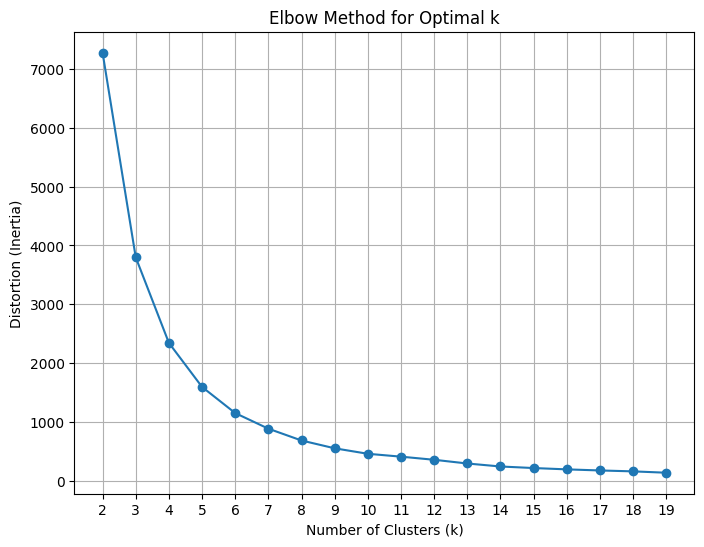

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the image data (assuming it's saved as 'image_data.csv')
df = pd.read_csv('image_data.csv')

# Select the features for clustering (ignore the 'label' column)
X = df[['width', 'height', 'file_size']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize a list to store the distortion (inertia) for each k
distortions = []

# Perform K-means clustering for k values from 2 to 19
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(2, 20), distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.xticks(range(2, 20))
plt.grid(True)
plt.show()
